In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [13]:
fs_df = pd.read_pickle('../data/fs_df.pkl')
cs5_df = pd.read_pickle('../data/cs5_df.pkl')
cs6_df = pd.read_pickle('../data/cs6_df.pkl')
# fs_df = fs_df.drop(columns=['REQMEM','REQTIME'])

<BarContainer object of 7 artists>

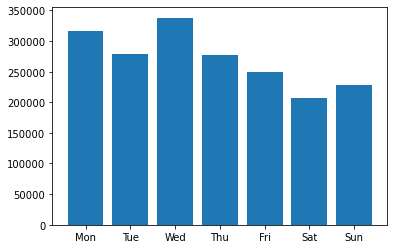

In [4]:
jobs_weekday = [len(fs_df[fs_df['BEGIN'].dt.day == x]) for x in range(1,8)]
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], jobs_weekday)

<BarContainer object of 24 artists>

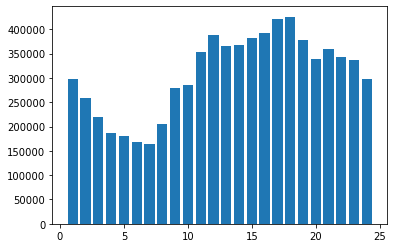

In [5]:
jobs_hour = [len(fs_df[fs_df['BEGIN'].dt.hour == x]) for x in range(0,24)]
hours = [x for x in range(1,25)]
plt.bar(hours, jobs_hour)

In [6]:
partitions = fs_df['PARTITION'].unique()

In [10]:
fs_df[fs_df['STATE'].str.match(r'CANCELLED')].value_counts('EXITCODE')

EXITCODE
0:0      8744
1:0      2176
0:15     1887
0:9      1361
0:7       389
0:11       35
0:6        18
0:2        16
127:0       5
0:40        4
0:105       2
2:0         2
0:12        1
0:8         1
0:98        1
9:0         1
dtype: int64

# def get_delta(row):
    days, hms = row.split('-') if '-' in row else [0, row]
    hours, minutes, seconds = hms.split(':')
    return timedelta(days=int(days), seconds=int(seconds), minutes=int(minutes), hours=int(hours))
fs_df['REQTIME'] = fs_df['REQTIME'].apply(get_delta)
fs_df['USEDTIME'] = fs_df['USEDTIME'].apply(get_delta)